In [0]:
from datetime import datetime 
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
import numpy as np
import pyspark
from pyspark.sql import SparkSession
import scipy
from pyspark.sql.functions import sum, col, desc

In [0]:
#pyspark
df_pyspark = sqlContext.sql("SELECT * FROM results_yz524.dateset_geo_ip") #creating pandas dataframe from the table
df_pyspark.select('*').show()

+--------------+----------+-----------+-------------------+-------------+----------+
 ip_address| timestamp|device_type| email| city| state|
+--------------+----------+-----------+-------------------+-------------+----------+
 97.73.101.60|1614832500| iOS| ggijfj@yahoo.com| San Jose|California|
199.231.81.186|1615250100| Windows|iidgljb@hotmail.com| Prattsville| New York|
172.58.228.123|1614978900| iOS| bdjjbfga@gmail.com|New York City| New York|
 172.58.225.0|1615213200| Windows| akgifb@aol.com|New York City| New York|
 172.58.225.0|1615315200| Android| akgifb@aol.com|New York City| New York|
 172.58.225.0|1614989700| OSX| cjkicj@gmail.com|New York City| New York|
 172.58.225.0|1614990000| iOS| cjkicj@gmail.com|New York City| New York|
 172.58.225.0|1615069800| OSX| cjkicj@gmail.com|New York City| New York|
 172.58.225.0|1615074000| iOS| cjkicj@gmail.com|New York City| New York|
 172.58.225.0|1615220400| OSX| cjkicj@gmail.com|New York City| New York|
 76.160.15.0|1614610800| OSX| bfehafbk@gmail.com|New York City| New York|
 76.160.15.0|1614874200| Android| bfehafbk@gmail.com|New York City| New York|
 76.160.15.0|1615296000| iOS| bfehafbk@gmail.com|New York City| New York|
 24.194.109.0|1614714600| Android| bdiihij@mail.com| Gloversville| New York|
 24.194.109.0|1614759000| Android| bdiihij@mail.com| Gloversville| New York|
 24.194.109.0|1614974100| OSX| bdiihij@mail.com| Gloversville| New York|
 24.194.109.0|1615023000| Android| bdiihij@mail.com| Gloversville| New York|
 24.194.109.0|1615044300| iOS| bdiihij@mail.com| Gloversville| New York|
 172.58.225.0|1615017900| iOS| aifjacl@mail.com|New York City| New York|
 172.58.225.0|1615022100| iOS| aifjacl@mail.com|New York City| New York|
+--------------+----------+-----------+-------------------+-------------+----------+
only showing top 20 rows

In [0]:
df = sqlContext.sql("SELECT * FROM results_yz524.dateset_geo_ip") #creating pandas dataframe from the table
df = df.toPandas()
df_ny = df[df['state'] == 'New York'].copy()
# df_ny.head()
df.head(10)

Out[450]:

,ip_address,timestamp,device_type,email,city,state
0,97.73.101.60,1614832500,iOS,ggijfj@yahoo.com,San Jose,California
1,199.231.81.186,1615250100,Windows,iidgljb@hotmail.com,Prattsville,New York
2,172.58.228.123,1614978900,iOS,bdjjbfga@gmail.com,New York City,New York
3,172.58.225.0,1615213200,Windows,akgifb@aol.com,New York City,New York
4,172.58.225.0,1615315200,Android,akgifb@aol.com,New York City,New York
5,172.58.225.0,1614989700,OSX,cjkicj@gmail.com,New York City,New York
6,172.58.225.0,1614990000,iOS,cjkicj@gmail.com,New York City,New York
7,172.58.225.0,1615069800,OSX,cjkicj@gmail.com,New York City,New York
8,172.58.225.0,1615074000,iOS,cjkicj@gmail.com,New York City,New York
9,172.58.225.0,1615220400,OSX,cjkicj@gmail.com,New York City,New York


In [0]:
df['datetime'] = [datetime.fromtimestamp(d) for d in df['timestamp']] #converting timestamp to datetime and adding new into column
df_ny['datetime'] = [datetime.fromtimestamp(d) for d in df_ny['timestamp']] #converting timestamp to datetime and adding new into column
df.head(10)

# df_pyspark = spark.sql("select timestamp, to_timestamp(timestamp) as ts, date(to_timestamp(timestamp)) as date, hour(to_timestamp(timestamp)) as hour, dayofweek(to_timestamp(timestamp)) as dayofweek, device_type, email, city, state from results_yz524.dateset_geo_ip")
# df_pyspark.show()

Out[451]:

,ip_address,timestamp,device_type,email,city,state,datetime
0,97.73.101.60,1614832500,iOS,ggijfj@yahoo.com,San Jose,California,2021-03-04 04:35:00
1,199.231.81.186,1615250100,Windows,iidgljb@hotmail.com,Prattsville,New York,2021-03-09 00:35:00
2,172.58.228.123,1614978900,iOS,bdjjbfga@gmail.com,New York City,New York,2021-03-05 21:15:00
3,172.58.225.0,1615213200,Windows,akgifb@aol.com,New York City,New York,2021-03-08 14:20:00
4,172.58.225.0,1615315200,Android,akgifb@aol.com,New York City,New York,2021-03-09 18:40:00
5,172.58.225.0,1614989700,OSX,cjkicj@gmail.com,New York City,New York,2021-03-06 00:15:00
6,172.58.225.0,1614990000,iOS,cjkicj@gmail.com,New York City,New York,2021-03-06 00:20:00
7,172.58.225.0,1615069800,OSX,cjkicj@gmail.com,New York City,New York,2021-03-06 22:30:00
8,172.58.225.0,1615074000,iOS,cjkicj@gmail.com,New York City,New York,2021-03-06 23:40:00
9,172.58.225.0,1615220400,OSX,cjkicj@gmail.com,New York City,New York,2021-03-08 16:20:00


In [0]:
df_email_count = df.groupby(["email"])["email"].count().reset_index(name='count').copy() #grouping even counts per email
df_email_count = df_email_count.sort_values(by='count', ascending=False) #sorting the values
df_email_count.head(15)

# df_email_count = df_ny.groupby(["email"])["email"].count().reset_index(name='count').copy() #grouping even counts per email
# df_email_count = df_email_count.sort_values(by='count', ascending=False) #sorting the values
# df_email_count.head(15)

# df_pyspark.groupBy('email').count().sort(desc("count")).show() #alternative for grouping by email name and count func

Out[452]:

,email,count
9406,afcijiif@gmail.com,1287
63201,cldakfc@hotmail.com,946
19768,alabbig@gmail.com,802
232647,kilghki@mail.com,689
220516,kcckgffj@gmail.com,674
114378,fdjcfbaa@mail.com,319
206701,jghiglfb@yahoo.com,303
175224,ibcjdh@yahoo.com,295
182191,ifagicg@hotmail.com,276
176639,icaadca@aol.com,245


In [0]:
df_email_count['count'].median() #median event count per emails

#pyspark alternative find min max email count of top 25%
df_pyspark_email_count = df_pyspark.groupBy('email').count().sort(desc("count"))
number_of_rows = int(df_pyspark_email_count.count() * 0.25)
max = df_pyspark_email_count.collect()[0]
min = df_pyspark_email_count.collect()[number_of_rows]
print("Max: ", max)
print("Min: ", min)

Max: Row(email='afcijiif@gmail.com', count=1287)
Min: Row(email='dbejbe@aol.com', count=4)

In [0]:
# df_pyspark_email_count = df_pyspark_email_count.withColumn("count", df_pyspark_email_count["count"].cast('int'))

In [0]:
df_email_count_plot = df_email_count.sort_values(by='count', ascending = False).head(15)
df_email_count_plot = df_email_count_plot.sort_values(by='count', ascending=True) 

#plotting histogram with event counts per email
fig = px.bar(df_email_count_plot, x=df_email_count_plot['count'], y = df_email_count_plot['email'], orientation='h', hover_data=['email', 'count'], title='Count of events by email address')
fig.show()

In [0]:
df_active_fr_sat_10pm_8am = df[(df['datetime'].dt.day_name() == 'Friday') | (df['datetime'].dt.day_name() == 'Saturday')].copy() #friday or saturday day
df_active_fr_sat_10pm_8am = df_active_fr_sat_10pm_8am[~(df_active_fr_sat_10pm_8am['datetime'].dt.hour.between(8, 20))].copy() #excluding outside of 20:00 PM to 8:00 AM
df_active_fr_sat_10pm_8am.head(15)

#pyspark alternative for filters
# df_pyspark = df_pyspark.withColumn("dayofweek", pyspark.sql.functions.dayofweek('ts').alias('day'))
# df_pyspark = df_pyspark.withColumn("hour", pyspark.sql.functions.hour('ts').alias('hour'))
# df_pyspark = df_pyspark.filter(((df_pyspark['dayofweek'] == 5) & (df_pyspark['hour'] >= 22)) | ((df_pyspark['dayofweek'] == 6) & (df_pyspark['hour'] >= 8)))
# df_pyspark.groupBy("city").count().sort(desc("count")).show()

Out[455]:

,ip_address,timestamp,device_type,email,city,state,datetime
2,172.58.228.123,1614978900,iOS,bdjjbfga@gmail.com,New York City,New York,2021-03-05 21:15:00
5,172.58.225.0,1614989700,OSX,cjkicj@gmail.com,New York City,New York,2021-03-06 00:15:00
6,172.58.225.0,1614990000,iOS,cjkicj@gmail.com,New York City,New York,2021-03-06 00:20:00
7,172.58.225.0,1615069800,OSX,cjkicj@gmail.com,New York City,New York,2021-03-06 22:30:00
8,172.58.225.0,1615074000,iOS,cjkicj@gmail.com,New York City,New York,2021-03-06 23:40:00
24,72.197.51.225,1614999900,OSX,iieifhj@gmail.com,Oceanside,California,2021-03-06 03:05:00
27,172.58.32.0,1614982800,iOS,jaijah@gmail.com,Stockton,California,2021-03-05 22:20:00
28,172.58.32.0,1614983400,Android,jaijah@gmail.com,Stockton,California,2021-03-05 22:30:00
29,172.58.32.0,1614985500,Android,jaijah@gmail.com,Stockton,California,2021-03-05 23:05:00
34,70.181.218.0,1614910800,Android,fjcaff@gmail.com,Escondido,California,2021-03-05 02:20:00


In [0]:
df[df['datetime'].dt.day_name().isin(['Friday', 'Saturday']) & (df['datetime'].dt.hour <=20)].sort_values(by='datetime', ascending = True)

Out[555]:

,ip_address,timestamp,device_type,email,city,state,datetime,email domain,hour
137487,174.249.24.0,1614902400,OSX,lbckcl@gmail.com,Albany,New York,2021-03-05 00:00:00,gmail.com,0
738408,75.131.78.140,1614902400,Android,jkfjjjg@gmail.com,Plattsburgh,New York,2021-03-05 00:00:00,gmail.com,0
230279,104.32.188.234,1614902400,iOS,kcgcdaj@hotmail.com,Los Angeles,California,2021-03-05 00:00:00,hotmail.com,0
605399,70.95.71.0,1614902400,iOS,cjeldbi@gmail.com,San Diego,California,2021-03-05 00:00:00,gmail.com,0
112501,108.41.167.31,1614902400,iOS,clibi@aol.com,New York City,New York,2021-03-05 00:00:00,aol.com,0
...,...,...,...,...,...,...,...,...,...
521908,184.153.80.215,1615064100,Android,jilek@gmail.com,East Harlem,New York,2021-03-06 20:55:00,gmail.com,20
87261,73.219.198.176,1615064100,OSX,daljak@hotmail.com,Heritage Hills,New York,2021-03-06 20:55:00,hotmail.com,20
686371,67.248.63.228,1615064100,OSX,aeihlgdg@mail.com,Dunkirk,New York,2021-03-06 20:55:00,mail.com,20
780334,104.162.139.23,1615064100,OSX,bidfe@gmail.com,Fresh Meadows,New York,2021-03-06 20:55:00,gmail.com,20


In [0]:
df[((df['datetime'].dt.day_name() == 'Friday') & (df['datetime'].dt.hour >= 22)) | ((df['datetime'].dt.day_name() == 'Saturday') & (df['datetime'].dt.hour <= 7))].sort_values(by='datetime', ascending = False)

Out[628]:

,ip_address,timestamp,device_type,email,city,state,datetime,email domain,hour,cluster
948399,70.95.219.0,1615017300,Windows,iabld@gmail.com,San Diego,California,2021-03-06 07:55:00,gmail.com,7,4
373704,174.195.138.0,1615017300,iOS,billbhci@hotmail.com,Rancho Cucamonga,California,2021-03-06 07:55:00,hotmail.com,7,8
522314,174.194.129.0,1615017300,iOS,edlckebb@mail.com,San Jose,California,2021-03-06 07:55:00,mail.com,7,4
742036,108.30.154.0,1615017300,iOS,ljkegcji@mail.com,New York City,New York,2021-03-06 07:55:00,mail.com,7,1
257556,100.1.247.227,1615017300,Android,dkfik@hotmail.com,New York City,New York,2021-03-06 07:55:00,hotmail.com,7,1
...,...,...,...,...,...,...,...,...,...,...
242091,69.112.72.0,1614981600,Android,dedadgkb@gmail.com,New Rochelle,New York,2021-03-05 22:00:00,gmail.com,22,1
241188,206.221.128.0,1614981600,Android,ejbhlg@gmail.com,New York City,New York,2021-03-05 22:00:00,gmail.com,22,1
436940,108.30.140.232,1614981600,Android,hdgdhddd@aol.com,New York City,New York,2021-03-05 22:00:00,aol.com,22,1
240531,172.58.32.0,1614981600,Android,ddebia@gmail.com,Stockton,California,2021-03-05 22:00:00,gmail.com,22,9


In [0]:
df_most_active_cities = df_active_fr_sat_10pm_8am.groupby(["city"])["city"].count().reset_index(name="count").copy() #grouping even counts per cities
df_most_active_cities = df_most_active_cities.sort_values(by='count', ascending=False)
df_most_active_cities.head(10)

# df_most_active_cities = df_ny.groupby(["city"])["city"].count().reset_index(name="count").copy() #grouping even counts per cities
# df_most_active_cities = df_most_active_cities.sort_values(by='count', ascending=False)
# df_most_active_cities.head(10)

Out[556]:

,city,count
461,New York City,30816
384,Los Angeles,5097
620,San Jose,2908
615,San Diego,2063
605,Sacramento,1677
618,San Francisco,1384
74,Buffalo,1198
689,Stockton,1121
593,Rochester,1056
316,Irvine,915


In [0]:
df_most_active_cities_plot = df_most_active_cities.sort_values(by='count', ascending = False).head(15)
df_most_active_cities_plot = df_most_active_cities_plot.sort_values(by='count', ascending=True)

fig = px.bar(df_most_active_cities_plot, 
             x = df_most_active_cities_plot['count'], 
             y = df_most_active_cities_plot['city'], 
             orientation='h', hover_data=['city', 'count'], 
             title='Top cities event counts on Fri 10pm - Sat 8am:')
fig.show()

In [0]:
df_day_event_count = df.groupby(df['datetime'].dt.date)['datetime'].count().reset_index(name='count').copy()
df_day_event_count = df_day_event_count.sort_values(by='count', ascending=False)
df_day_event_count

# df_day_event_count = df_ny.groupby(df_ny['datetime'].dt.date)['datetime'].count().reset_index(name='count').copy()
# df_day_event_count = df_day_event_count.sort_values(by='count', ascending=False)
# df_day_event_count

Out[558]:

,datetime,count
1,2021-03-02,140038
8,2021-03-09,127739
3,2021-03-04,120040
4,2021-03-05,115078
2,2021-03-03,111650
5,2021-03-06,105249
0,2021-03-01,103157
7,2021-03-08,90675
6,2021-03-07,86374


In [0]:
df_pyspark.groupby('date').count().sort(desc("count")).show()

--------------------------------------------------------------------------- 
 AnalysisException Traceback (most recent call last)
 <command-2655536976652020> in <module> 
 ----> 1 df_pyspark . groupby ( 'date' ) . count ( ) . sort ( desc ( "count" ) ) . show ( ) 

 /databricks/spark/python/pyspark/sql/group.py in _api (self) 
 29 def _api ( self ) : 
 30 name = f . __name__
 ---> 31 jdf = getattr ( self . _jgd , name ) ( ) 
 32 return DataFrame ( jdf , self . sql_ctx ) 
 33 _api . __name__ = f . __name__

 /databricks/spark/python/lib/py4j-0.10.9.1-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 121 # Hide where the exception came from that shows a non-Pythonic 
 122 # JVM exception message. 
 --> 123 raise converted from None 
 124 else : 
 125 raise 

 AnalysisException : Column 'date' does not exist. Did you mean one of the following? [spark_catalog.results_yz524.dateset_geo_ip.city, spark_catalog.results_yz524.dateset_geo_ip.email, spark_catalog.results_yz524.dateset_geo_ip.state, spark_catalog.results_yz524.dateset_geo_ip.timestamp, spark_catalog.results_yz524.dateset_geo_ip.ip_address, spark_catalog.results_yz524.dateset_geo_ip.device_type];
'Aggregate ['date], ['date, count(1) AS count#282070L]
+- Project [ip_address#269443, timestamp#269444L, device_type#269445, email#269446, city#269447, state#269448]
 +- SubqueryAlias spark_catalog.results_yz524.dateset_geo_ip
 +- Relation results_yz524.dateset_geo_ip[ip_address#269443,timestamp#269444L,device_type#269445,email#269446,city#269447,state#269448] parquet

In [0]:
# import plotly.express as px
# fig = px.bar(df_day_event_count, x = df_day_event_count['datetime'], y = df_day_event_count['count'])
# fig.show()

In [0]:
df_event_count_per_calendar_day = df.groupby(df['datetime'].dt.date)['datetime'].count().reset_index(name='count').copy()
fig = px.line(df_event_count_per_calendar_day, x = 'datetime', y = 'count', title = "") #visualizing time series even counts per calenday day
fig.update_layout(
    title="Time series plot of event counts per calendar day:",
    xaxis_title="Calendar days",
    yaxis_title="Event counts",
)
fig.show()

In [0]:
#creating a new tabele of event counts per day of week
new_df = pd.DataFrame(df['email'].unique(), columns=['email'])
new_df = new_df.join(df[df['datetime'].dt.day_name() == 'Monday'].groupby(df['email'])['email'].count().reset_index(name='Monday').set_index('email'), on='email').copy()
new_df = new_df.join(df[df['datetime'].dt.day_name() == 'Tuesday'].groupby(df['email'])['email'].count().reset_index(name='Tuesday').set_index('email'), on='email').copy()
new_df = new_df.join(df[df['datetime'].dt.day_name() == 'Wednesday'].groupby(df['email'])['email'].count().reset_index(name='Wednesday').set_index('email'), on='email').copy()
new_df = new_df.join(df[df['datetime'].dt.day_name() == 'Thursday'].groupby(df['email'])['email'].count().reset_index(name='Thursday').set_index('email'), on='email').copy()
new_df = new_df.join(df[df['datetime'].dt.day_name() == 'Friday'].groupby(df['email'])['email'].count().reset_index(name='Friday').set_index('email'), on='email').copy()
new_df = new_df.join(df[df['datetime'].dt.day_name() == 'Saturday'].groupby(df['email'])['email'].count().reset_index(name='Saturday').set_index('email'), on='email').copy()
new_df = new_df.join(df[df['datetime'].dt.day_name() == 'Sunday'].groupby(df['email'])['email'].count().reset_index(name='Sunday').set_index('email'), on='email').copy()
new_df['Total'] = new_df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].sum(axis=1).copy()
new_df = new_df.sort_values(by='Total', ascending = False).copy()
new_df.head(10)

Out[562]:

,email,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Total
19030,afcijiif@gmail.com,279.0,318.0,136.0,136.0,145.0,161.0,112.0,1287.0
184311,cldakfc@hotmail.com,206.0,246.0,101.0,116.0,42.0,204.0,31.0,946.0
8233,alabbig@gmail.com,199.0,192.0,65.0,85.0,81.0,93.0,87.0,802.0
15055,kilghki@mail.com,322.0,80.0,120.0,18.0,83.0,40.0,26.0,689.0
73231,kcckgffj@gmail.com,164.0,163.0,36.0,106.0,53.0,100.0,52.0,674.0
144964,fdjcfbaa@mail.com,83.0,87.0,48.0,53.0,43.0,5.0,NaN,319.0
51239,jghiglfb@yahoo.com,59.0,68.0,40.0,30.0,35.0,48.0,23.0,303.0
56865,ibcjdh@yahoo.com,51.0,106.0,15.0,57.0,8.0,49.0,9.0,295.0
161130,ifagicg@hotmail.com,65.0,65.0,14.0,32.0,22.0,52.0,26.0,276.0
51575,icaadca@aol.com,27.0,62.0,3.0,19.0,50.0,34.0,50.0,245.0


In [0]:
#alternative pyspark solution
# df_pyspark_day_of_week = df_pyspark.groupBy(['email', 'dayofweek']).count().sort(desc("count"))
# df_pyspark_day_of_week.filter(df_pyspark_day_of_week['dayofweek'] == 2).withColumn('Sunday', col('dayofweek')).groupBy('email').sum('count').sort(desc("sum(count)")).show()

In [0]:
new_df = new_df.reset_index(drop=True).copy()
max_val = np.max((new_df['Total'].loc[0: int(len(new_df.index) * 0.25)]))
min_val = np.min((new_df['Total'].loc[0: int(len(new_df.index) * 0.25)]))
print(f'Maximum :{max_val}, minumum: {min_val} number of events')

Maximum :1287.0, minumum: 4.0 number of events

In [0]:
df['email domain'] = df['email'].str.split("@").str[1] #adding email domains from email addresses
df['hour'] = df['datetime'].dt.hour #adding hour of the day values from datetime column

In [0]:
df.head()

Out[566]:

,ip_address,timestamp,device_type,email,city,state,datetime,email domain,hour
0,97.73.101.60,1614832500,iOS,ggijfj@yahoo.com,San Jose,California,2021-03-04 04:35:00,yahoo.com,4
1,199.231.81.186,1615250100,Windows,iidgljb@hotmail.com,Prattsville,New York,2021-03-09 00:35:00,hotmail.com,0
2,172.58.228.123,1614978900,iOS,bdjjbfga@gmail.com,New York City,New York,2021-03-05 21:15:00,gmail.com,21
3,172.58.225.0,1615213200,Windows,akgifb@aol.com,New York City,New York,2021-03-08 14:20:00,aol.com,14
4,172.58.225.0,1615315200,Android,akgifb@aol.com,New York City,New York,2021-03-09 18:40:00,aol.com,18


In [0]:
df_clustering = df.copy()

In [0]:
#categorizing the features such as device type, cities, states and email domains for kmeans clustering
df_clustering['device_type'] = df_clustering['device_type'].astype('category')
df_clustering['device_type'] = df_clustering['device_type'].cat.codes

df_clustering['city'] = df_clustering['city'].astype('category')
df_clustering['city'] = df_clustering['city'].cat.codes

df_clustering['state'] = df_clustering['state'].astype('category')
df_clustering['state'] = df_clustering['state'].cat.codes

df_clustering['email domain'] = df_clustering['email domain'].astype('category')
df_clustering['email domain'] = df_clustering['email domain'].cat.codes

In [0]:
# !pip install kmodes
# from kmodes.kmodes import KModes
# cost = []
# clusters = range(1,10)
# for n in list(clusters):
#     kmode = KModes(n_clusters=n, init = "random", n_init = 5, verbose=1)
#     kmode.fit_predict(df_clustering)
#     cost.append(kmode.cost_)
    
# plt.plot(clusters, cost, 'bx-')
# plt.xlabel('Number of clusters')
# plt.ylabel('Cost')
# plt.title('KModes Clustering')
# plt.show()

In [0]:
kmeans = KMeans(10) #defining 10 clusters
kmeans.fit(df_clustering[['device_type', 'city', 'state', 'email domain', 'hour']])

Out[570]: KMeans(n_clusters=10)

In [0]:
clusters = kmeans.fit_predict(df_clustering[['device_type', 'city', 'state', 'email domain', 'hour']])
df['cluster'] = clusters #storing the cluster values

Out[572]:

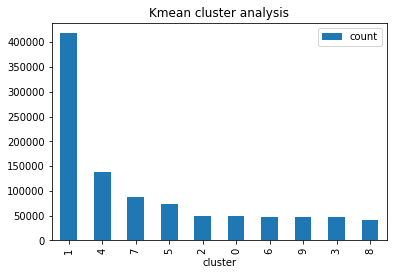

<AxesSubplot:title={'center':'Kmean cluster analysis'}, xlabel='cluster'>

In [0]:
#plotting aggregated cluster values to define the optimal number of clusters for this dataset
df_cluster_plot = df.groupby('cluster')['cluster'].count().reset_index(name='count').copy()
df_cluster_plot.sort_values('count', ascending=False).plot.bar(x='cluster', y='count', title = 'Kmean cluster analysis')

In [0]:
#correlation analysis of features
df_clustering[['device_type', 'city', 'state', 'email domain', 'hour']].corr("spearman").style.background_gradient(cmap='coolwarm')

Out[573]:

,device_type,city,state,email domain,hour
device_type,1.000000,0.000293,-0.001196,-0.000169,-0.000582
city,0.000293,1.000000,-0.071650,-0.000756,0.000074
state,-0.001196,-0.071650,1.000000,0.003972,0.020383
email domain,-0.000169,-0.000756,0.003972,1.000000,0.002244
hour,-0.000582,0.000074,0.020383,0.002244,1.000000


In [0]:
columns = ['device_type', 'city', 'email domain', 'hour']
index = ['device_type', 'city', 'email domain', 'hour']
chi2_correlation_df = pd.DataFrame(columns = columns, index = index)
for i in chi2_correlation_df.index: #iterate over rows
    for j in chi2_correlation_df.columns: #iterate over columns
        crosstab = pd.crosstab(df_clustering[i], df_clustering[j])
        chi2, p, dof, expected = scipy.stats.chi2_contingency(crosstab)
        chi2_correlation_df.at[i, j] = p
chi2_correlation_df       

Out[574]:

,device_type,city,email domain,hour
device_type,0.0,0.079614,0.97238,0.890888
city,0.079614,0.0,0.0,0.0
email domain,0.97238,0.0,0.0,0.0
hour,0.890888,0.0,0.0,0.0


In [0]:
df_device_type_event_count = df.groupby(df['device_type'])['device_type'].count().reset_index(name='count').copy()

fig = px.bar(df_device_type_event_count, 
             x = df_device_type_event_count['device_type'], 
             y = df_device_type_event_count['count'])

fig.update_layout(
    title='Events per device type:',
    xaxis_title="Device type",
    yaxis_title="Event counts",
)

fig.show()

In [0]:
df_email_domain_event_count = df.groupby(df['email domain'])['email domain'].count().reset_index(name='count').copy()

fig = px.bar(df_email_domain_event_count, 
             x = df_email_domain_event_count['email domain'], 
             y = df_email_domain_event_count['count'])

fig.update_layout(
    title='Event counts per email domain where users have registered:',
    xaxis_title="Email domains",
    yaxis_title="Event counts",
)

fig.show()

In [0]:
df_hour_event_count = df.groupby(df['datetime'].dt.hour)['datetime'].count().reset_index(name='count').copy()
# df_hour_event_count = df_hour_event_count.sort_values(by='count', ascending=False)
fig = px.bar(df_hour_event_count, 
             x = df_hour_event_count['datetime'], 
             y = df_hour_event_count['count'], 
             title='Event count distribution per hour of a day:')
fig.show()

In [0]:
df_pyspark.groupby("hour").count().sort("hour").show()

--------------------------------------------------------------------------- 
 AnalysisException Traceback (most recent call last)
 <command-2655536976652114> in <module> 
 ----> 1 df_pyspark . groupby ( "hour" ) . count ( ) . sort ( "hour" ) . show ( ) 

 /databricks/spark/python/pyspark/sql/group.py in _api (self) 
 29 def _api ( self ) : 
 30 name = f . __name__
 ---> 31 jdf = getattr ( self . _jgd , name ) ( ) 
 32 return DataFrame ( jdf , self . sql_ctx ) 
 33 _api . __name__ = f . __name__

 /databricks/spark/python/lib/py4j-0.10.9.1-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 121 # Hide where the exception came from that shows a non-Pythonic 
 122 # JVM exception message. 
 --> 123 raise converted from None 
 124 else : 
 125 raise 

 AnalysisException : Column 'hour' does not exist. Did you mean one of the following? [spark_catalog.results_yz524.dateset_geo_ip.city, spark_catalog.results_yz524.dateset_geo_ip.email, spark_catalog.results_yz524.dateset_geo_ip.state, spark_catalog.results_yz524.dateset_geo_ip.ip_address, spark_catalog.results_yz524.dateset_geo_ip.timestamp, spark_catalog.results_yz524.dateset_geo_ip.device_type];
'Aggregate ['hour], ['hour, count(1) AS count#282106L]
+- Project [ip_address#269443, timestamp#269444L, device_type#269445, email#269446, city#269447, state#269448]
 +- SubqueryAlias spark_catalog.results_yz524.dateset_geo_ip
 +- Relation results_yz524.dateset_geo_ip[ip_address#269443,timestamp#269444L,device_type#269445,email#269446,city#269447,state#269448] parquet

In [0]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Requirement already satisfied: pip in /databricks/python3/lib/python3.8/site-packages (21.0.1)
Collecting pip
 Using cached pip-22.1.2-py3-none-any.whl (2.1 MB)
 ERROR: Will not install to the user site because it will lack sys.path precedence to pip in /databricks/python3/lib/python3.8/site-packages 
 WARNING: You are using pip version 21.0.1; however, version 22.1.2 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.